In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('./fatal-police-shootings-data.csv')

In [3]:
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [4]:
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
date = pd.to_datetime(data['date'])
year = date.dt.year
data['year']=year

In [6]:
data.describe()

,id,age,year
count,2327.000000,2272.000000,2327.000000
mean,1332.603782,36.497799,2015.734422
std,728.658164,12.983579,0.718229
min,3.000000,6.000000,2015.000000
25%,712.500000,NaN,2015.000000
50%,1334.000000,NaN,2016.000000
75%,1959.500000,NaN,2016.000000
max,2591.000000,91.000000,2017.000000


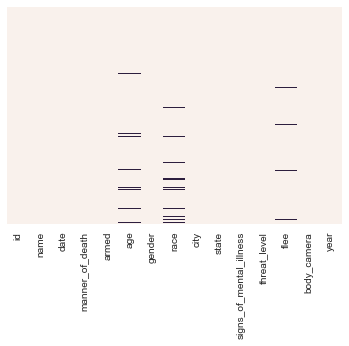

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [8]:
data[data.isnull().any(axis=1)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
59,110,William Campbell,2015-01-25,shot,gun,59.0,M,NaN,Winslow,NJ,False,attack,Not fleeing,False,2015
124,584,Alejandro Salazar,2015-02-20,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False,2015
241,244,John Marcell Allen,2015-03-30,shot,gun,54.0,M,NaN,Boulder City,NV,False,attack,Not fleeing,False,2015
266,534,Mark Smith,2015-04-09,shot and Tasered,vehicle,54.0,M,NaN,Kellyville,OK,False,attack,Other,False,2015
340,433,Joseph Roy,2015-05-07,shot,knife,72.0,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False,2015
398,503,James Anthony Morris,2015-05-31,shot,gun,40.0,M,NaN,Medford,OR,True,attack,Not fleeing,False,2015
417,523,James Johnson,2015-06-08,shot,gun,54.0,M,NaN,Beech Grove,IN,True,attack,Not fleeing,False,2015
426,542,Raymond Phillips,2015-06-11,shot,gun,86.0,M,NaN,Columbia,TN,True,attack,Not fleeing,False,2015
470,604,Brian Johnson,2015-07-02,shot,crossbow,59.0,M,NaN,Meadow Bridge,WV,True,attack,Not fleeing,False,2015
518,641,Charles Crandall,2015-07-14,shot,gun,76.0,M,NaN,Southington,OH,False,attack,Not fleeing,False,2015


# Number of shootings by police officers on duty:

## per year
(2017 is up to 05-17-2017)

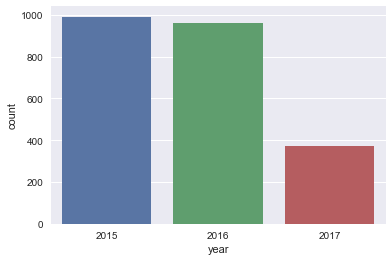

In [9]:
sns.countplot(x='year',data=data)

# per state

In [10]:
perState = data.groupby('state')['id'].count().to_frame().sort_values(by='id',ascending=False)
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
mapdata = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = perState.index.tolist(),
            locationmode = 'USA-states',
            z= perState['id'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2))
            ) 

In [11]:
layout = dict(title = 'Number of Police Shootings by Officers on Duty from 2015-2017',
              geo = dict(scope='usa'))
choromap = go.Figure(data = [mapdata],layout = layout)
iplot(choromap)

## per State per year

In [12]:
perStateY = data.groupby(['state','year'])['id'].count().to_frame().sort_values(by='id',ascending=False)
perStateY.reset_index(inplace=True)
perStateY
perStateY.pivot_table(values='id',index='state',columns=['year'])

year,2015,2016,2017
state,,,
AK,4.0,7.0,2.0
AL,17.0,25.0,4.0
AR,5.0,15.0,5.0
AZ,42.0,50.0,13.0
CA,189.0,138.0,66.0
CO,29.0,31.0,7.0
CT,2.0,4.0,3.0
DC,4.0,5.0,2.0
DE,3.0,1.0,4.0


## Age distribution of fatalities shot by police officers on duty

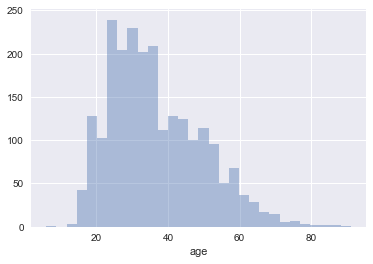

In [13]:
sns.distplot(data['age'].dropna(),kde=False)

In [14]:
data['age'].dropna().describe()

count    2272.000000
mean       36.497799
std        12.983579
min         6.000000
25%        26.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

# Median age of fatalities per state

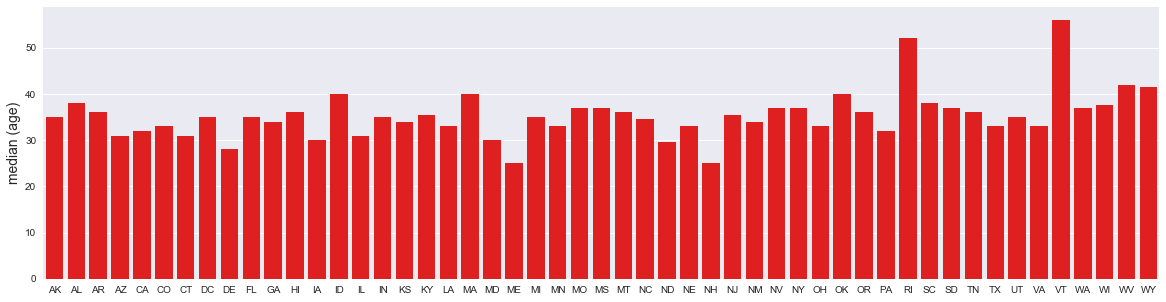

In [15]:
plt.figure(figsize=(20,5))
tmp = data.groupby('state')['age'].median().to_frame()
ax =sns.barplot(x=tmp.index.tolist(),y='age',data=tmp,color='red')
ax.set_ylabel('median (age)',fontsize=14)

# Number of shootings with body cameras on/off 

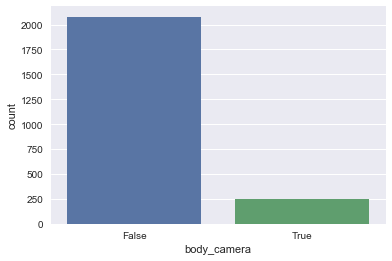

In [16]:
sns.countplot(data['body_camera'])

# Number of shootings involving fatalities with mental illness

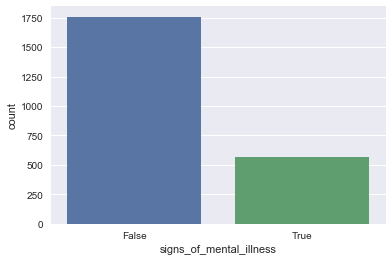

In [17]:
sns.countplot(data['signs_of_mental_illness'])

# Number of fatalities by race

'\nW: White, non-Hispanic\nB: Black, non-Hispanic\nA: Asian\nN: Native American\nH: Hispanic\nO: Other\nNone: unknown\n'

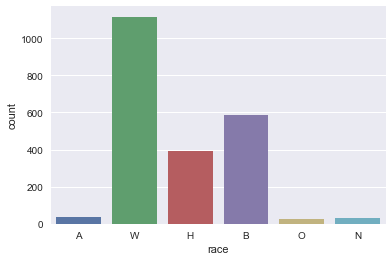

In [18]:
sns.countplot(data['race'])
'''
W: White, non-Hispanic
B: Black, non-Hispanic
A: Asian
N: Native American
H: Hispanic
O: Other
None: unknown
'''

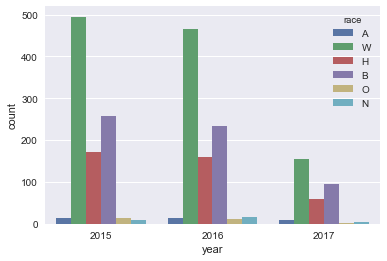

In [19]:
date = pd.to_datetime(data['date']).dt.year
data['year'] = date
sns.countplot(x='year',hue='race',data=data)

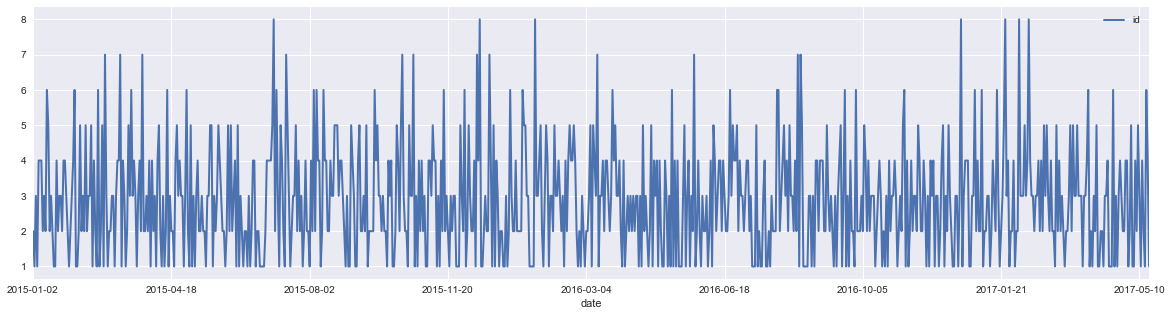

In [20]:
plt.figure(figsize=(100,150))
byday = data.groupby('date')['id'].count().to_frame().reset_index()
byday.plot.line(x='date',y='id',figsize=(20,5),lw=2)
#byday

# Number of fatalities who were under 18
The descriptives show that there are some of those who were shot were under 18. Where did these shootings happen (city and state), the race of the victims, and what was the threat level.

In [21]:
youngVic= data[data['age']<18]

In [22]:
youngVic['id'].nunique()

46

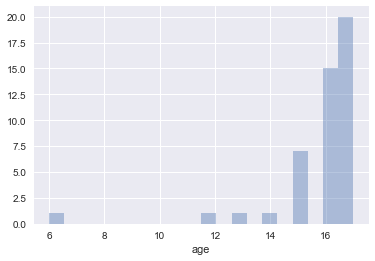

In [23]:
sns.distplot(youngVic['age'],kde=False)

A total of 46 people were victims of police shootings from 2015-2017. Let's check the numbers per year:

In [24]:
dateY = pd.to_datetime(youngVic['date'])
yearY = dateY.dt.year
youngVic['year']= yearY

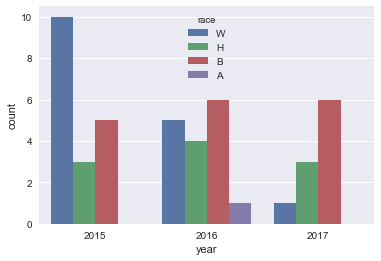

In [25]:
sns.countplot(x='year',hue='race',data=youngVic)

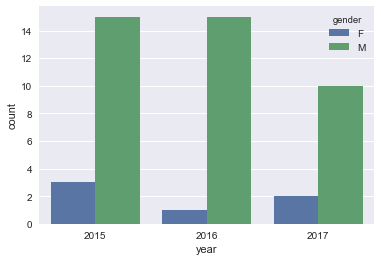

In [26]:
sns.countplot(x='year',hue='gender',data=youngVic)

# Number of police shootings per year involving fatalities under 18 
- per threat level

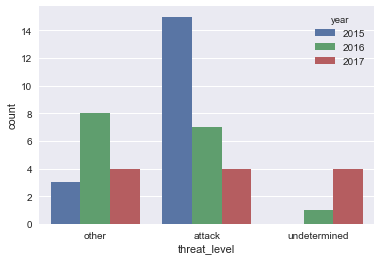

In [27]:
sns.countplot(x='threat_level',hue='year',data=youngVic)

- per state

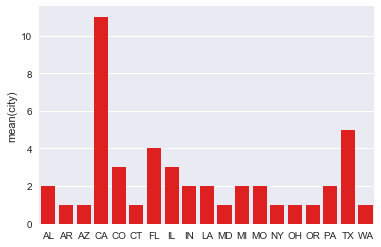

In [28]:
byState = youngVic.groupby(['state'])['city'].count().to_frame()
sns.barplot(x=byState.index.tolist(),y='city',data=byState,color='red')

California and Texas seem to have the highest number of incidents of police shootings with victims under 18.

# To be continued...